In [31]:
!pip install -U gdown  # If not already installed

import gdown

# Replace with your actual file ID
file_id = "1hzOveJho24su8n-nfIeYXGFbTflRL7Gy"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output="mcdonalds.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hzOveJho24su8n-nfIeYXGFbTflRL7Gy
To: /content/mcdonalds.csv
100%|██████████| 97.0k/97.0k [00:00<00:00, 3.04MB/s]


'mcdonalds.csv'

In [32]:
import pandas as pd

df = pd.read_csv("mcdonalds.csv")  # or .xlsx, .json, etc. based on your file type
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [34]:
# Step 3: Get column names (equivalent to `names(mcdonalds)` in R)
print(df.columns.tolist())

# Step 4: Get the shape of the dataset (equivalent to `dim(mcdonalds)` in R)
print("Shape:", df.shape)  # [rows, columns]

# Step 5: Display first 3 rows (equivalent to `head(mcdonalds, 3)` in R)
print(df.head(3))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Shape: (1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [35]:
# Step 1: Select first 11 columns
MD_x = df.iloc[:, 0:11]

# Step 2: Convert "Yes" to 1, all other values to 0
MD_x = (MD_x == "Yes").astype(int)

# Step 3: Compute column-wise means, rounded to 2 decimal places
column_means = MD_x.mean().round(2)

# Step 4: Display the result
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [36]:
from sklearn.decomposition import PCA

# Step 2: Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Step 3: Extract explained variance info
explained_var = pca.explained_variance_
explained_ratio = pca.explained_variance_ratio_
cumulative_ratio = np.cumsum(explained_ratio)

# Step 4: Display summary like R's output
summary_df = pd.DataFrame({
    "Standard Deviation": np.round(np.sqrt(explained_var), 4),
    "Proportion of Variance": np.round(explained_ratio, 4),
    "Cumulative Proportion": np.round(cumulative_ratio, 4)
})

# Display the result
print(summary_df)

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [37]:
# Step 1: Standard deviations of principal components
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p=11):")
print(np.round(std_devs, 1))

# Step 2: Loadings (rotation matrix)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=MD_x.columns
)

print("\nRotation matrix (loadings):")
print(loadings.round(2))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation matrix (loadings):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy       0.48 -0.36  0.30  0.06  0.31 -0.17 -0.28 -0.01 -0.57  0.11 -0.05
convenient  0.16 -0.02  0.06 -0.14 -0.28  0.35 -0.06  0.11  0.02  0.67  0.54
spicy       0.01 -0.02  0.04  0.20 -0.07  0.36  0.71 -0.38 -0.40  0.08 -0.14
fattening  -0.12  0.03  0.32 -0.35  0.07  0.41 -0.39 -0.59  0.16  0.01 -0.25
greasy     -0.30  0.06  0.80  0.25 -0.36 -0.21  0.04  0.14  0.00 -0.01 -0.00
fast        0.11  0.09  0.06 -0.10 -0.11  0.59 -0.09  0.63 -0.17 -0.24 -0.34
cheap       0.34  0.61  0.15  0.12  0.13  0.10 -0.04 -0.14 -0.08 -0.43  0.49
tasty       0.47 -0.31  0.29 -0.00  0.21  0.08  0.36  0.07  0.64 -0.08 -0.02
expensive  -0.33 -0.60 -0.02  0.07  0.00  0.26 -0.07 -0.03 -0.07 -0.45  0.49
healthy     0.21 -0.08 -0.19  0.76 -0.29  0.18 -0.35 -0.18  0.19  0.04 -0.16
disgusting -0.37  0.14  0.09  0.37  0.73  0

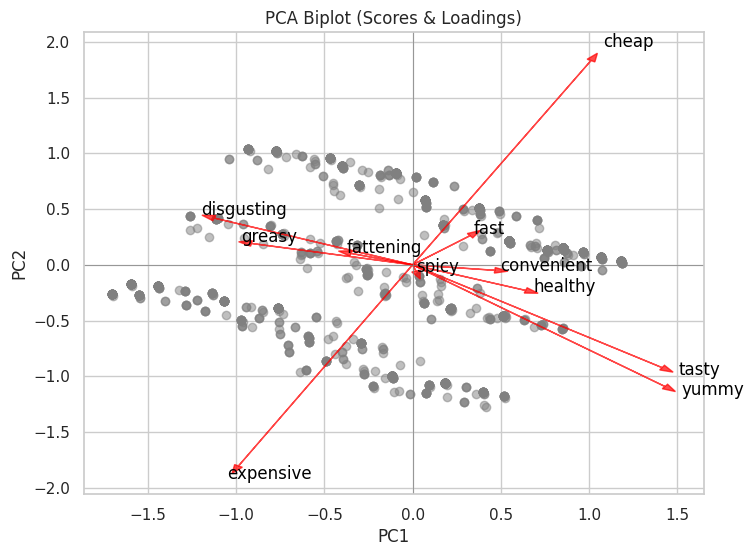

In [38]:
scores = pca.transform(MD_x)
loadings = pca.components_.T

# Create biplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot PCA scores (grey points)
ax.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.5)

# Plot variable vectors (loadings)
for i, var in enumerate(MD_x.columns):
    ax.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
             color='red', alpha=0.7, head_width=0.05)
    ax.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, var, color='black')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Biplot (Scores & Loadings)")
ax.grid(True)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)
plt.show()

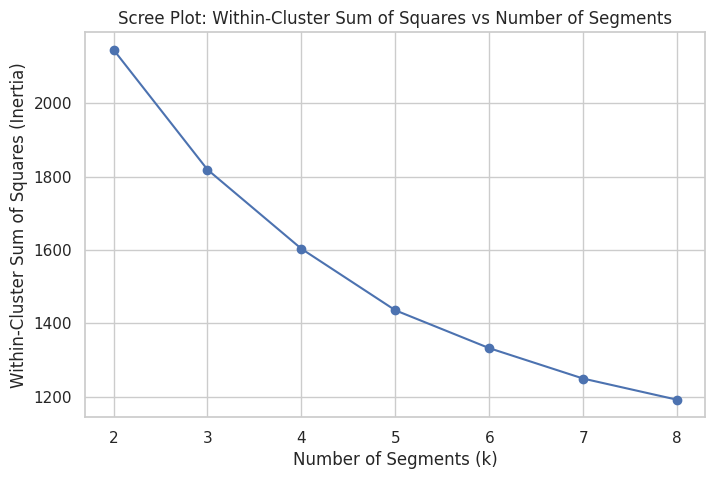

In [39]:
from sklearn.cluster import KMeans

# Step 2: Set random seed
np.random.seed(1234)

# Step 3: Store inertia (within-cluster sum of squares) for k = 2 to 8
inertias = []
k_range = range(2, 9)

for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    model.fit(MD_x)
    inertias.append(model.inertia_)

# Step 4: Plot scree plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Scree Plot: Within-Cluster Sum of Squares vs Number of Segments")
plt.xlabel("Number of Segments (k)")
plt.ylabel("Within-Cluster Sum of Squares (Inertia)")
plt.grid(True)
plt.show()

Clustering stability for k=2 to 8: 100%|██████████| 7/7 [00:29<00:00,  4.28s/it]


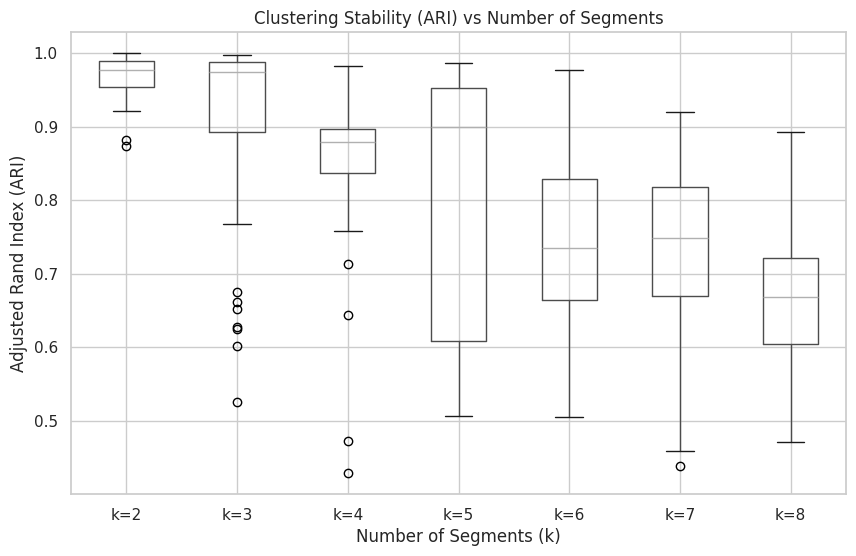

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from tqdm import tqdm

# Set seed
np.random.seed(1234)

# Parameters
k_range = range(2, 9)
nboot = 100
nrep = 10

# Store results
ari_results = {k: [] for k in k_range}

# Bootstrap loop
for k in tqdm(k_range, desc="Clustering stability for k=2 to 8"):
    # Fit original model once (reference labels)
    ref_model = KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit(MD_x)
    ref_labels = ref_model.labels_

    for _ in range(nboot):
        # Sample with replacement
        indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        X_boot = MD_x.iloc[indices]

        # Fit k-means on bootstrap sample
        boot_model = KMeans(n_clusters=k, n_init=nrep, random_state=None).fit(X_boot)

        # Predict labels on original data using trained bootstrap model
        boot_labels_on_orig = boot_model.predict(MD_x)

        # Compute ARI between bootstrap labels and reference labels
        ari = adjusted_rand_score(ref_labels, boot_labels_on_orig)
        ari_results[k].append(ari)

# Convert to DataFrame for boxplot
ari_df = pd.DataFrame(dict([(f"k={k}", pd.Series(v)) for k, v in ari_results.items()]))

# Plot boxplot
plt.figure(figsize=(10, 6))
ari_df.boxplot()
plt.title("Clustering Stability (ARI) vs Number of Segments")
plt.xlabel("Number of Segments (k)")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.grid(True)
plt.show()

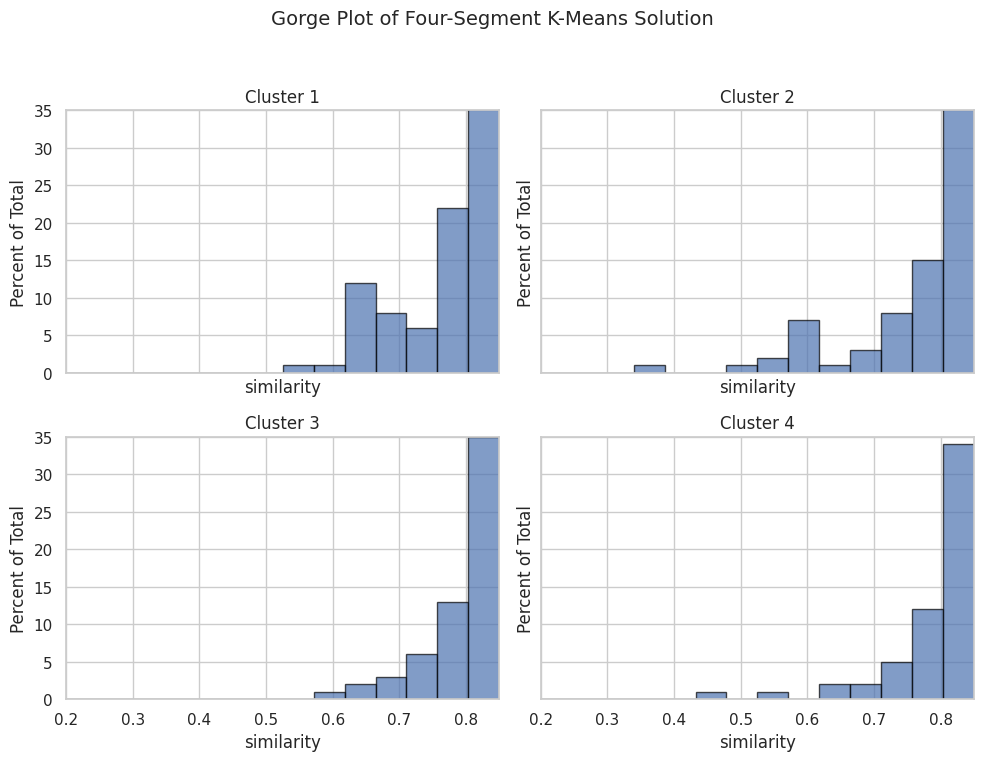

In [41]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


# --- Run KMeans with 4 clusters ---
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels = kmeans.fit_predict(MD_x)
centroids = kmeans.cluster_centers_

# --- Calculate cosine similarity to assigned cluster centroids ---
similarities = cosine_similarity(MD_x, centroids)
assigned_sim = np.array([similarities[i, label] for i, label in enumerate(labels)])

# --- Prepare for plotting ---
df_plot = pd.DataFrame({
    "Cluster": labels,
    "Similarity": assigned_sim
})

# --- Plot(4 subplots) ---
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Gorge Plot of Four-Segment K-Means Solution", fontsize=14)

for i in range(4):
    ax = axes[i // 2, i % 2]
    cluster_data = df_plot[df_plot["Cluster"] == i]["Similarity"]
    ax.hist(cluster_data, bins=np.linspace(0.2, 0.85, 15), edgecolor='black', alpha=0.7)
    ax.set_title(f"Cluster {i+1}")
    ax.set_xlim(0.2, 0.85)
    ax.set_ylim(0, 35)
    ax.set_xlabel("similarity")
    ax.set_ylabel("Percent of Total")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

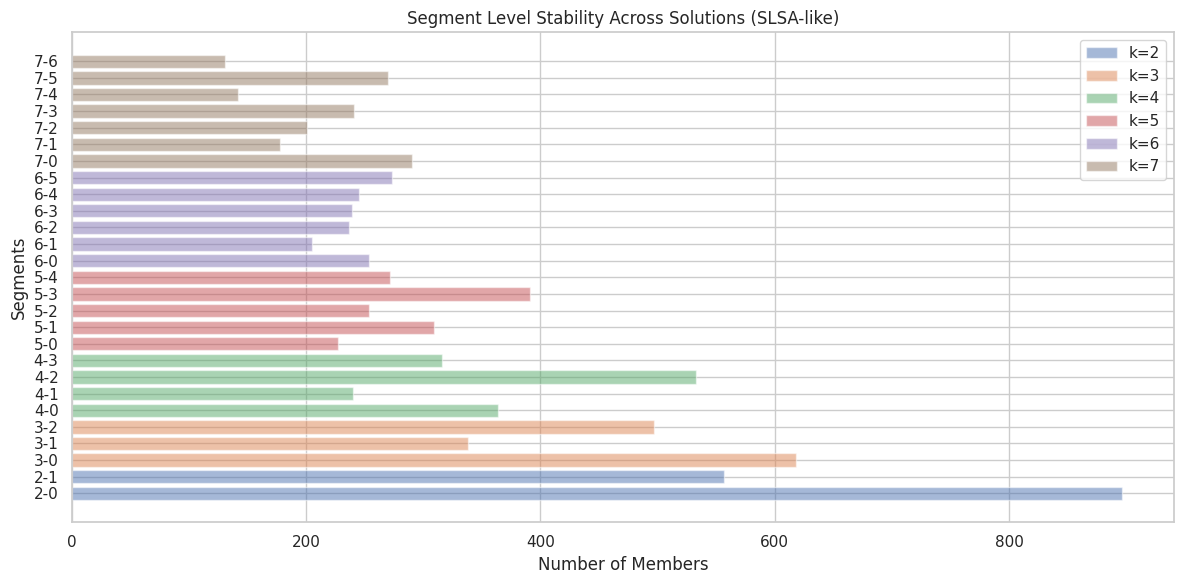

In [42]:
# Store labels for k = 2 to 8
labels_dict = {}
for k in range(2, 9):
    model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    labels_dict[k] = model.fit_predict(MD_x)

# Build transition matrix for SLSA-like plot
transition_data = []
for i in range(2, 8):  # from k=2 to k=7
    from_labels = labels_dict[i]
    to_labels = labels_dict[i + 1]
    for idx in range(len(MD_x)):
        transition_data.append({
            "k": i,
            "from": f"{i}-{from_labels[idx]}",
            "to": f"{i+1}-{to_labels[idx]}"
        })

df_transitions = pd.DataFrame(transition_data)

# Plot SLSA-like plot (Sankey-style via seaborn countplot hack)
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
for k in range(2, 8):
    counts = df_transitions[df_transitions["k"] == k]["from"].value_counts().sort_index()
    plt.barh(y=counts.index, width=counts.values, alpha=0.5, label=f"k={k}")

plt.title("Segment Level Stability Across Solutions (SLSA-like)")
plt.xlabel("Number of Members")
plt.ylabel("Segments")
plt.legend()
plt.tight_layout()
plt.show()

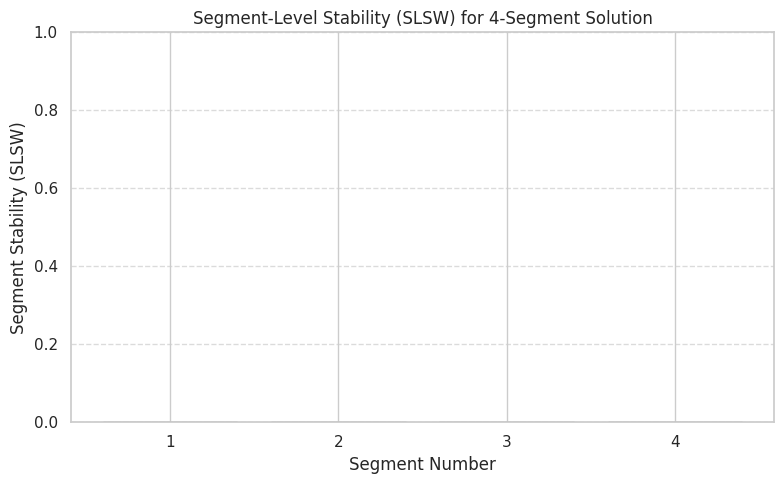

In [43]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score

# def segment_level_stability(X, labels, n_boot=100):
#     n_clusters = len(np.unique(labels))
#     stability = np.zeros(n_clusters)

#     for cluster in range(n_clusters):
#         idx = np.where(labels == cluster)[0]
#         if len(idx) <= 1:
#             stability[cluster] = np.nan
#             continue

#         scores = []
#         for _ in range(n_boot):
#             boot_idx = np.random.choice(idx, size=len(idx), replace=True)
#             X_boot = X[boot_idx]
#             model = KMeans(n_clusters=n_clusters, n_init=1, random_state=None)
#             boot_labels = model.fit_predict(X_boot)
#             original_labels = labels[boot_idx]
#             score = adjusted_rand_score(original_labels, boot_labels)
#             scores.append(score)
#         stability[cluster] = np.mean(scores)

#     return stability

# # Fit 4-cluster k-means
# final_k = 4
# model_k4 = KMeans(n_clusters=final_k, n_init=10, random_state=1234)
# labels_k4 = model_k4.fit_predict(MD_x.to_numpy())

# # Calculate stability
# stability_scores = segment_level_stability(MD_x.to_numpy(), labels_k4, n_boot=100)

# # Plot results
# plt.figure(figsize=(8, 5))
# plt.bar(range(1, final_k + 1), stability_scores, color='cornflowerblue', edgecolor='black')
# plt.ylim(0, 1)
# plt.xticks(range(1, final_k + 1))
# plt.xlabel("Segment Number")
# plt.ylabel("Segment Stability (SLSW)")
# plt.title("Segment-Level Stability (SLSW) for 4-Segment Solution")
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()


In [44]:
# print("Shape of MD_x:", MD_x.shape)
# print("Unique labels:", np.unique(labels_k4))

# stability_scores = segment_level_stability(MD_x.to_numpy(), labels_k4, n_boot=10)
# print("Stability scores:", stability_scores)

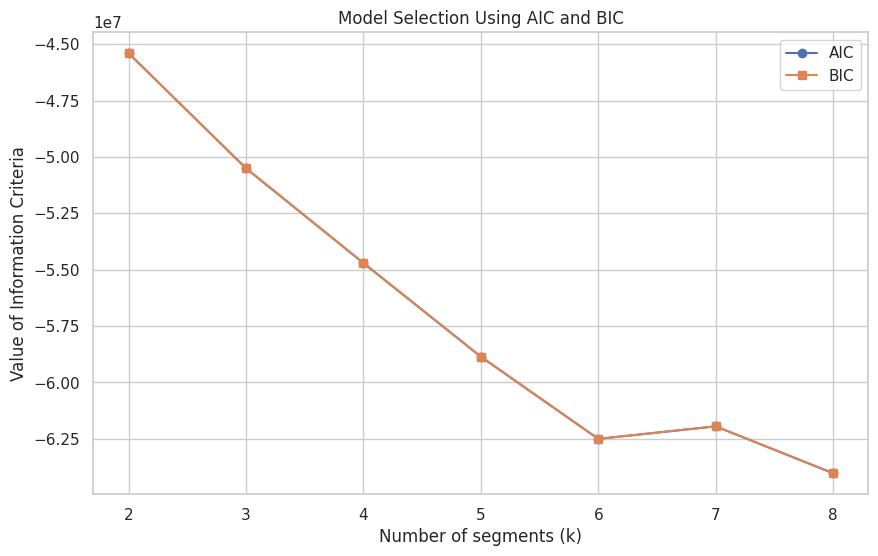

In [45]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Define function to compute AIC, BIC manually for k-means-like models
def compute_model_criteria(models, X):
    info = {
        'k': [],
        'log_likelihood': [],
        'aic': [],
        'bic': []
    }

    for k, model in models.items():
        ll = model.lower_bound_ * len(X)  # approximation
        n_params = k * X.shape[1]
        aic = -2 * ll + 2 * n_params
        bic = -2 * ll + np.log(len(X)) * n_params

        info['k'].append(k)
        info['log_likelihood'].append(ll)
        info['aic'].append(aic)
        info['bic'].append(bic)

    return pd.DataFrame(info)

# Fit mixture models with 2 to 8 components using BayesianGaussianMixture
models = {}
for k in range(2, 9):
    model = BayesianGaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=1234, max_iter=500)
    model.fit(MD_x)
    models[k] = model

# Evaluate criteria
criteria_df = compute_model_criteria(models, MD_x)

# Plot AIC, BIC
plt.figure(figsize=(10, 6))
plt.plot(criteria_df['k'], criteria_df['aic'], label='AIC', marker='o')
plt.plot(criteria_df['k'], criteria_df['bic'], label='BIC', marker='s')
plt.xlabel('Number of segments (k)')
plt.ylabel('Value of Information Criteria')
plt.title('Model Selection Using AIC and BIC')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Get 4-cluster solution
model_m4 = models[4]
m4_labels = model_m4.predict(MD_x)

# Assume MD.k4 (kmeans model with 4 clusters) is available as `kmeans_k4`
kmeans_k4 = KMeans(n_clusters=4, n_init=10, random_state=1234).fit(MD_x)
kmeans_labels = kmeans_k4.labels_

# Cross-tabulation of k-means vs mixture clusters
contingency = pd.crosstab(kmeans_labels, m4_labels, rownames=['kmeans'], colnames=['mixture'])

# Refit mixture model initialized with k-means clusters (approximate)
model_m4a = BayesianGaussianMixture(n_components=4, covariance_type='diag', max_iter=500,
                                     n_init=1, random_state=1234)
model_m4a.fit(MD_x)

# Predict again and compare
m4a_labels = model_m4a.predict(MD_x)
contingency_2 = pd.crosstab(kmeans_labels, m4a_labels, rownames=['kmeans'], colnames=['mixture'])

# Log-likelihoods
loglik_m4 = model_m4.lower_bound_ * len(MD_x)
loglik_m4a = model_m4a.lower_bound_ * len(MD_x)

(loglik_m4, loglik_m4a, contingency, contingency_2)

(np.float64(27350711.30019996),
 np.float64(24863672.96279457),
 mixture    0   1    2    3
 kmeans                    
 0         50  16  219   79
 1         14  26  200    0
 2        244  17    0  272
 3        271  45    0    0,
 mixture    0    1    2    3
 kmeans                     
 0         96   21  237   10
 1          0  206   14   20
 2        481    0    0   52
 3         19   35    0  262)

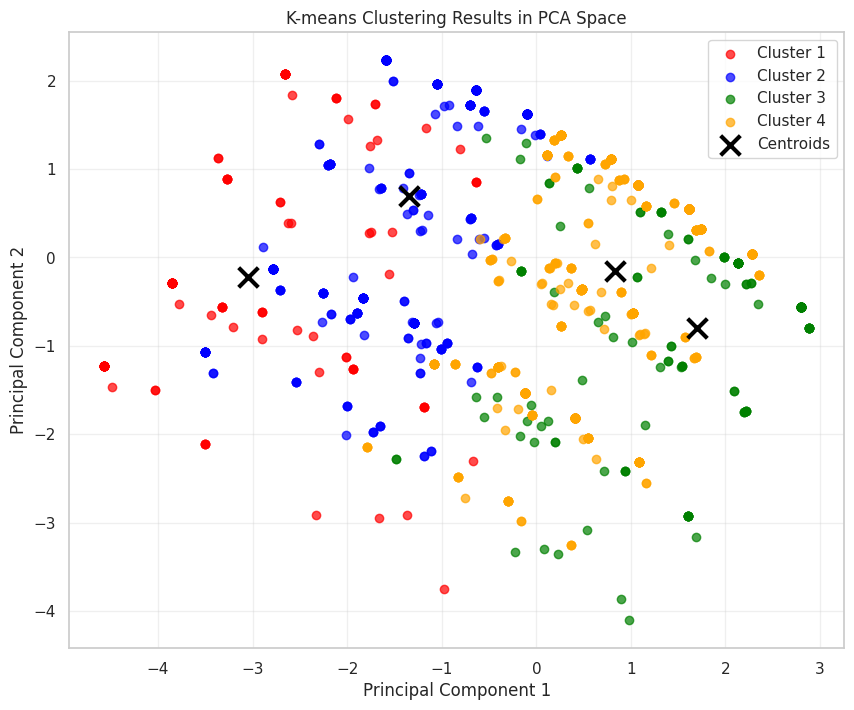

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Step 1: Standardize the data (often needed for PCA)
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Step 2: Perform PCA
MD_pca = PCA()
MD_pca_transformed = MD_pca.fit_transform(MD_x_scaled)

# Step 3: Perform K-means clustering (k=4)
MD_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = MD_k4.fit_predict(MD_x_scaled)

# Step 4: Create the plot equivalent to R's plot() function
plt.figure(figsize=(10, 8))

# Plot points colored by cluster
colors = ['red', 'blue', 'green', 'orange']
for i in range(4):
    mask = cluster_labels == i
    plt.scatter(MD_pca_transformed[mask, 0],
               MD_pca_transformed[mask, 1],
               c=colors[i],
               label=f'Cluster {i+1}',
               alpha=0.7)

# Add cluster centers projected onto PC space
centers_pca = MD_pca.transform(MD_k4.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
           c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Results in PCA Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 5: Display PCA information (equivalent to projAxes())
def proj_axes(pca_obj, feature_names=None, n_components=None):
    """
    Display PCA projection axes information
    Similar to R's projAxes() function
    """
    if n_components is None:
        n_components = min(5, pca_obj.n_components_)

    print("PCA Summary:")
    print("=" * 50)

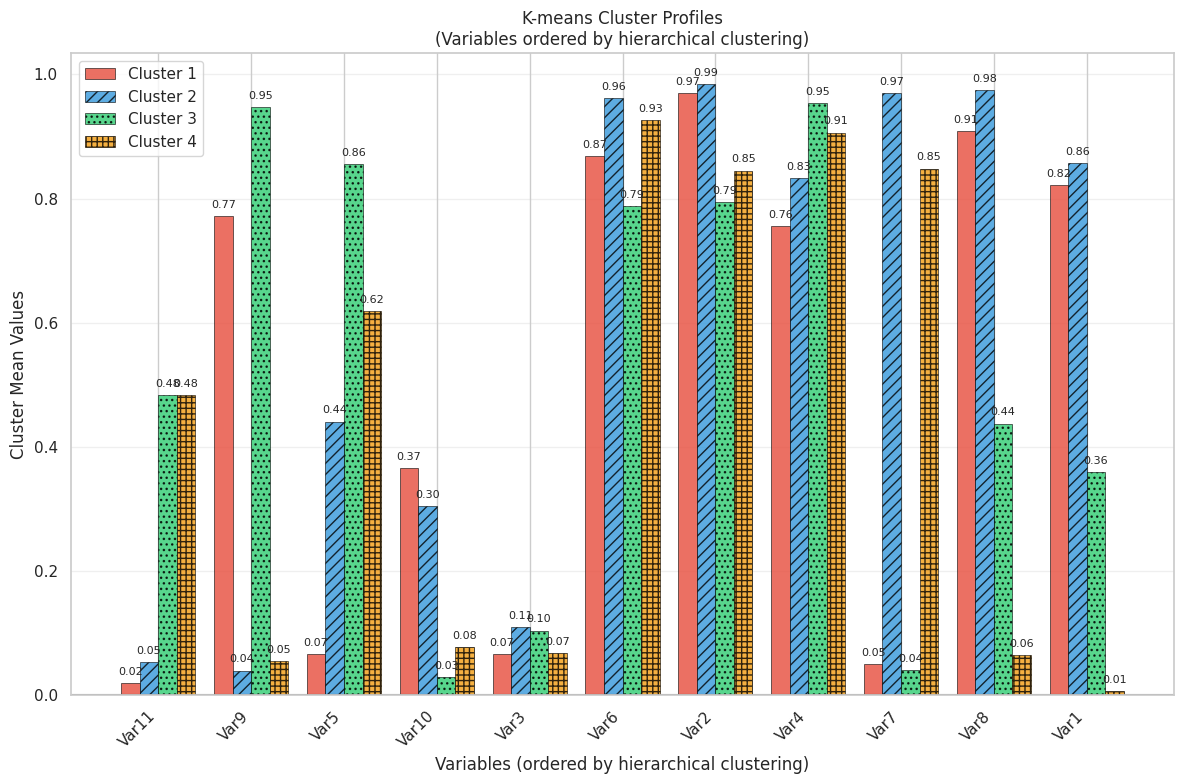

Variable ordering from hierarchical clustering:
Original indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Hierarchical order: [ 0  7  6  3  1  5  2  9  4  8 10]
Reversed order (used in plot): [10  8  4  9  2  5  1  3  6  7  0]
Variable names in plot order: ['Var11', 'Var9', 'Var5', 'Var10', 'Var3', 'Var6', 'Var2', 'Var4', 'Var7', 'Var8', 'Var1']

Cluster sizes: {'Cluster 1': np.int64(197), 'Cluster 2': np.int64(601), 'Cluster 3': np.int64(345), 'Cluster 4': np.int64(310)}


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, leaves_list

# Perform k-means clustering
MD_k4 = KMeans(n_clusters=4, random_state=42)
cluster_labels = MD_k4.fit_predict(MD_x)

# R> MD.vclust <- hclust(dist(t(MD.x)))
MD_vclust = linkage(MD_x.T, method='complete')

# R> barchart(MD.k4, shade = TRUE, which = rev(MD.vclust$order))
variable_order = leaves_list(MD_vclust)
reversed_order = variable_order[::-1]  # rev() equivalent

# Calculate cluster means for each variable
cluster_means = np.array([
    np.mean(MD_x[cluster_labels == i], axis=0)
    for i in range(4)
])

# Reorder variables according to hierarchical clustering
cluster_means_ordered = cluster_means[:, reversed_order]

# Create feature names
feature_names = [f'Var{i+1}' for i in range(MD_x.shape[1])]
feature_names_ordered = [feature_names[i] for i in reversed_order]

# Create the barchart with shading
fig, ax = plt.subplots(figsize=(12, 8))

# Shading: different colors for each cluster
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']  # Red, Blue, Green, Orange
patterns = ['', '///', '...', '+++']  # Different patterns for additional distinction

x = np.arange(len(feature_names_ordered))
width = 0.2

# Create grouped bars
for i in range(4):
    offset = (i - 1.5) * width
    bars = ax.bar(x + offset,
                  cluster_means_ordered[i],
                  width,
                  label=f'Cluster {i+1}',
                  color=colors[i],
                  hatch=patterns[i],
                  alpha=0.8,
                  edgecolor='black',
                  linewidth=0.5)

    # Add value labels on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.,
                height + 0.01 if height >= 0 else height - 0.03,
                f'{height:.2f}',
                ha='center', va='bottom' if height >= 0 else 'top',
                fontsize=8)

# Formatting
ax.set_xlabel('Variables (ordered by hierarchical clustering)')
ax.set_ylabel('Cluster Mean Values')
ax.set_title('K-means Cluster Profiles\n(Variables ordered by hierarchical clustering)')
ax.set_xticks(x)
ax.set_xticklabels(feature_names_ordered, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Print ordering information
print("Variable ordering from hierarchical clustering:")
print(f"Original indices: {list(range(len(feature_names)))}")
print(f"Hierarchical order: {variable_order}")
print(f"Reversed order (used in plot): {reversed_order}")
print(f"Variable names in plot order: {feature_names_ordered}")

# Print cluster sizes
cluster_sizes = [np.sum(cluster_labels == i) for i in range(4)]
print(f"\nCluster sizes: {dict(zip([f'Cluster {i+1}' for i in range(4)], cluster_sizes))}")


In [59]:
# MD_x[1:5]

In [60]:
# df.head()

Contingency Table (Clusters vs Like):
Like     +1  +2   +3   +4  -1  -2  -3  -4   0  I hate it!-5  I love it!+5
Cluster                                                                  
1        23  38   44   38   4   4   2   1  13             0            30
2        72  95  135  108  15   9   5   5  52             4           101
3        34  27   38   13  17  18  27  26  57            76            12
4        23  27   12    1  22  28  39  39  47            72             0


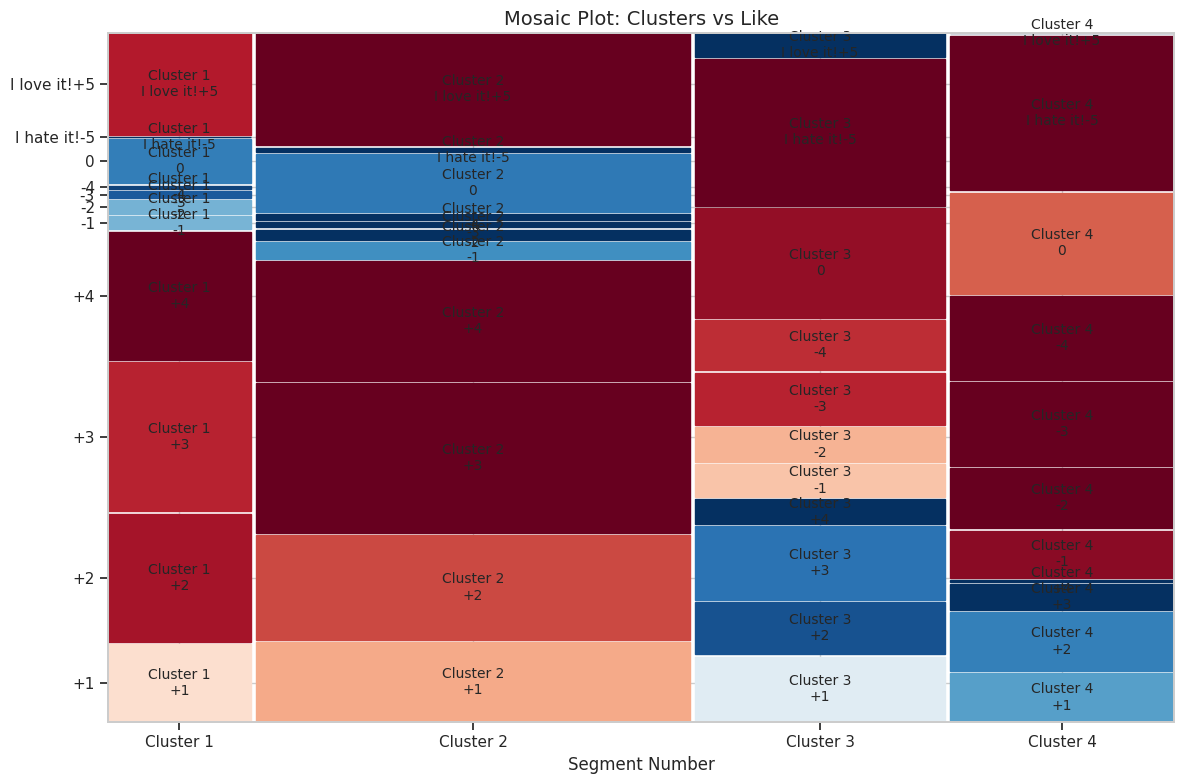

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Ensure MD_x and df are aligned
# assert len(MD_x) == len(df), "MD_x and df must have the same number of rows"

# Step 1: Apply KMeans clustering on MD_x
kmeans_model = KMeans(n_clusters=4, random_state=42)
k4 = kmeans_model.fit_predict(MD_x)

# Convert to 1-based index (like R)
k4_r_style = k4 + 1

# Step 2: Use actual Like column from df
mcdonalds_like = df['Like']

# Step 3: Create contingency table
contingency_table = pd.crosstab(k4_r_style, mcdonalds_like,
                                rownames=['Cluster'], colnames=['Like'])

print("Contingency Table (Clusters vs Like):")
print(contingency_table)

# Step 4: Function to create shaded mosaic plot
def create_mosaic_plot_statsmodels(contingency_table, shade=True):
    data_dict = {}
    for cluster in contingency_table.index:
        for like_val in contingency_table.columns:
            count = contingency_table.loc[cluster, like_val]
            data_dict[(f'Cluster {cluster}', like_val)] = count

    fig, ax = plt.subplots(figsize=(12, 8))

    if shade:
        # Calculate residuals for shading
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        residuals = (contingency_table - expected) / np.sqrt(expected)

        # Create color map based on residuals
        props = {}
        colors = plt.cm.RdBu_r(np.linspace(0, 1, 256))

        for cluster in contingency_table.index:
            for like_val in contingency_table.columns:
                resid = residuals.loc[cluster, like_val]
                color_idx = int(np.clip((resid + 3) / 6 * 255, 0, 255))
                props[(f'Cluster {cluster}', like_val)] = {'color': colors[color_idx]}

        mosaic(data_dict, ax=ax, properties=props)
    else:
        mosaic(data_dict, ax=ax)

    ax.set_xlabel('Segment Number', fontsize=12)
    ax.set_title('Mosaic Plot: Clusters vs Like', fontsize=14)
    plt.tight_layout()
    plt.show()

# Step 5: Plot it
create_mosaic_plot_statsmodels(contingency_table)


Contingency Table (Clusters vs Gender):
Gender   Female  Male
Cluster              
1            97   100
2           357   244
3           156   189
4           178   132


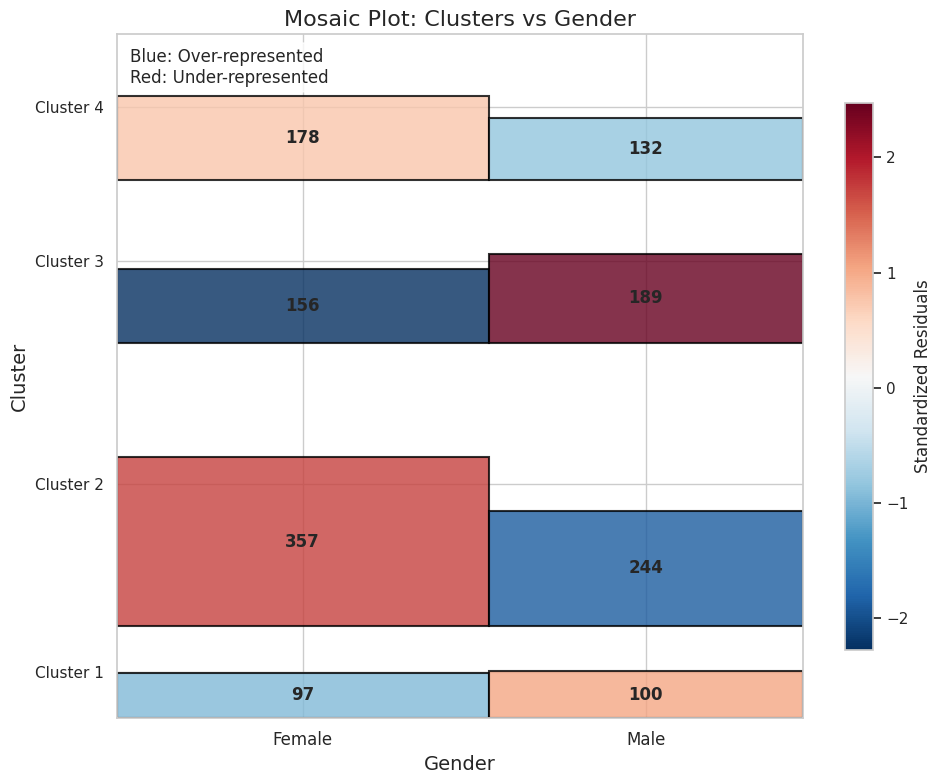

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# # Make sure MD_x and df are aligned
# assert len(MD_x) == len(df), "MD_x and df must have the same number of rows"

# Step 1: KMeans clustering on MD_x
kmeans_model = KMeans(n_clusters=4, random_state=42)
k4 = kmeans_model.fit_predict(MD_x)

# 1-based indexing to match R-style cluster numbering
k4_r_style = k4 + 1

# Step 2: Use actual Gender column from df
mcdonalds_gender = df["Gender"]

# Step 3: Create contingency table
contingency_table = pd.crosstab(k4_r_style, mcdonalds_gender,
                                rownames=['Cluster'], colnames=['Gender'])

print("Contingency Table (Clusters vs Gender):")
print(contingency_table)

# Step 4: Mosaic Plot Function
def create_mosaic_plot_gender(contingency_table, shade=True):
    fig, ax = plt.subplots(figsize=(10, 8))
    row_totals = contingency_table.sum(axis=1)
    col_totals = contingency_table.sum(axis=0)
    total = contingency_table.sum().sum()

    # Residual shading
    if shade:
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        residuals = (contingency_table - expected) / np.sqrt(expected)
        vmin, vmax = residuals.min().min(), residuals.max().max()
        norm = plt.Normalize(vmin=vmin, vmax=vmax)
        cmap = plt.cm.RdBu_r

    y_pos = 0
    for i, cluster in enumerate(contingency_table.index):
        cluster_prop = row_totals[cluster] / total
        x_pos = 0

        for j, gender in enumerate(contingency_table.columns):
            gender_prop = col_totals[gender] / total
            count = contingency_table.loc[cluster, gender]

            if count > 0:
                width = gender_prop
                height = cluster_prop * (count / row_totals[cluster])

                if shade:
                    resid = residuals.loc[cluster, gender]
                    color = cmap(norm(resid))
                    alpha = 0.8
                else:
                    color = ['lightblue', 'lightpink'][j % 2]
                    alpha = 0.7

                rect = plt.Rectangle((x_pos, y_pos), width, height,
                                     facecolor=color, edgecolor='black', linewidth=1.5, alpha=alpha)
                ax.add_patch(rect)

                if width > 0.1 and height > 0.05:
                    ax.text(x_pos + width/2, y_pos + height/2, str(count),
                            ha='center', va='center', fontweight='bold', fontsize=12)

            x_pos += gender_prop
        y_pos += cluster_prop

    # Axes and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Gender', fontsize=14)
    ax.set_ylabel('Cluster', fontsize=14)
    ax.set_title('Mosaic Plot: Clusters vs Gender', fontsize=16)

    # Y-axis: Cluster labels
    cluster_centers = []
    cumsum = 0
    for cluster in contingency_table.index:
        prop = row_totals[cluster] / total
        cluster_centers.append(cumsum + prop / 2)
        cumsum += prop
    ax.set_yticks(cluster_centers)
    ax.set_yticklabels([f'Cluster {cluster}' for cluster in contingency_table.index])

    # X-axis: Gender labels
    gender_centers = []
    cumsum = 0
    for gender in contingency_table.columns:
        prop = col_totals[gender] / total
        gender_centers.append(cumsum + prop / 2)
        cumsum += prop
    ax.set_xticks(gender_centers)
    ax.set_xticklabels(contingency_table.columns, fontsize=12)

    # Optional colorbar for shaded version
    if shade:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
        cbar.set_label('Standardized Residuals', fontsize=12)
        ax.text(0.02, 0.98, 'Blue: Over-represented\nRed: Under-represented',
                transform=ax.transAxes, va='top', ha='left',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Step 5: Call the function
create_mosaic_plot_gender(contingency_table)



/tmp/ipython-input-54-3638133082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=k4 ,y='Age', data=df,


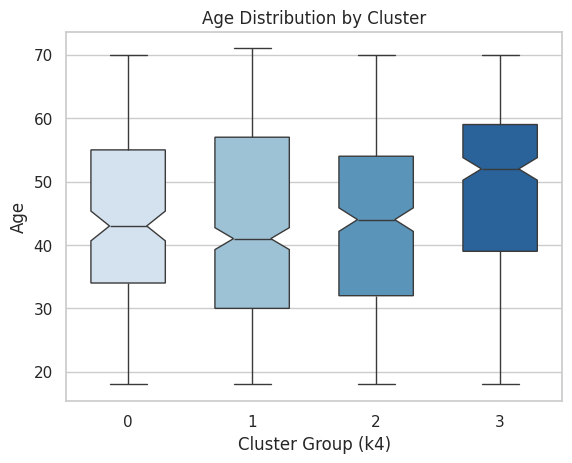

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Age' and 'k4' columns
sns.boxplot(x=k4 ,y='Age', data=df,
            width=0.6,        # Adjust box width
            notch=True,       # Notched boxes
            showfliers=True,  # Show outliers
            palette="Blues")  # Color scheme

plt.title("Age Distribution by Cluster")
plt.xlabel("Cluster Group (k4)")
plt.ylabel("Age")
plt.show()

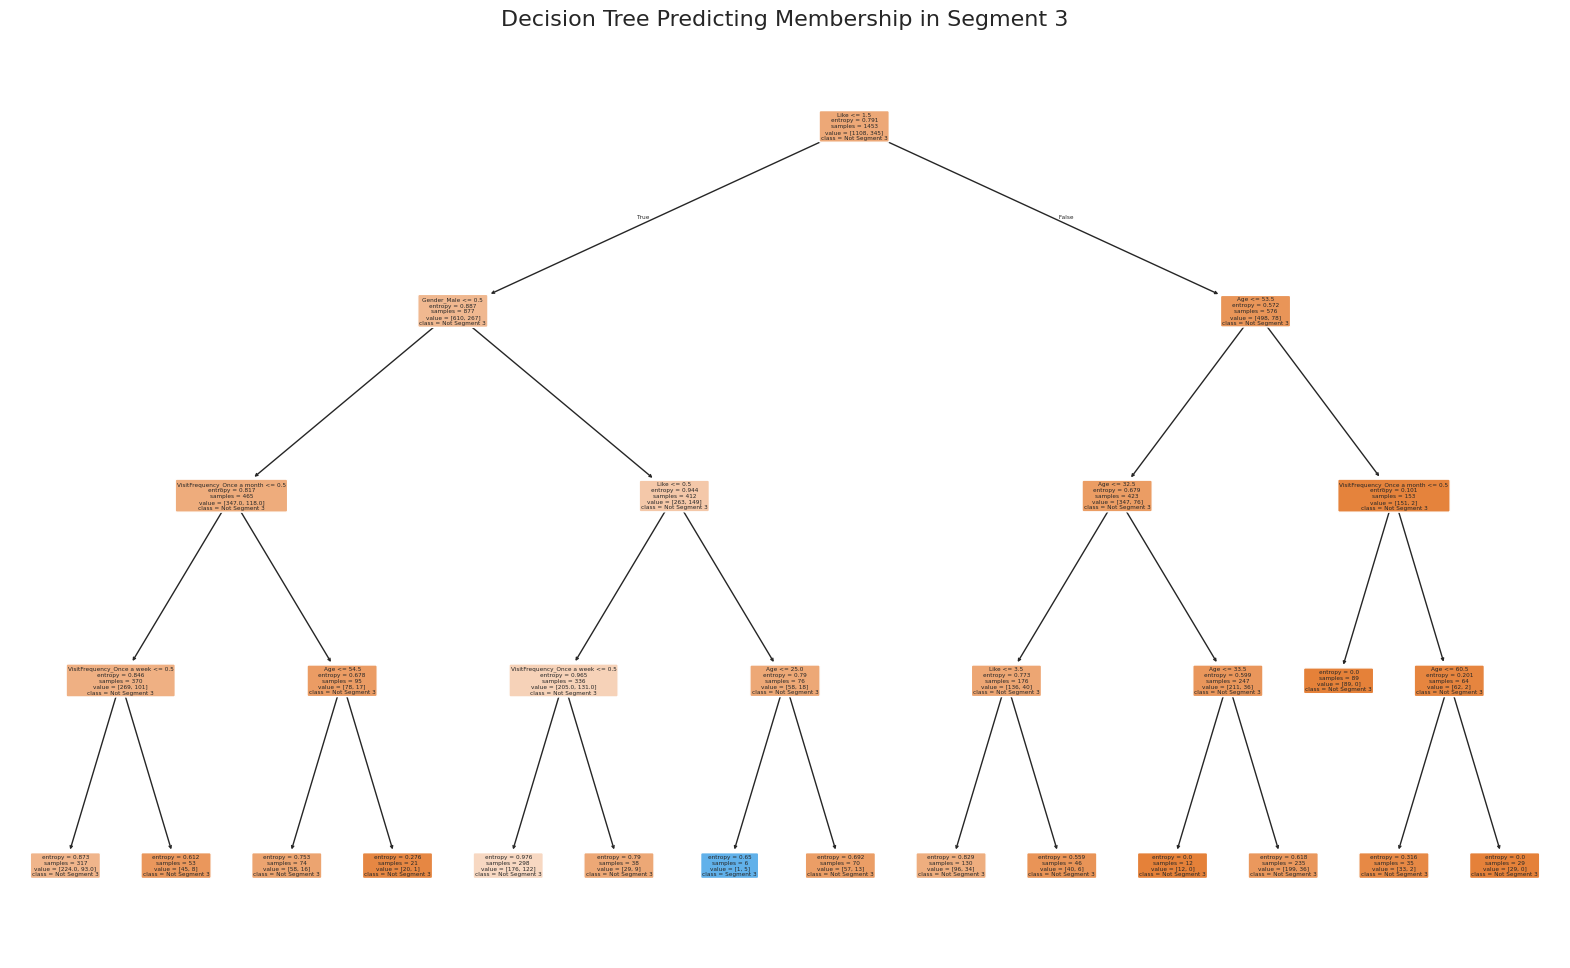

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Clean and convert 'Like' column
def clean_like_value(val):
    if isinstance(val, str):
        val = val.strip().replace('+', '')  # Remove plus sign
        val_lower = val.lower()
        mapping = {
            'i hate it!': -5,
            'i love it!': 5
        }
        if val_lower in mapping:
            return mapping[val_lower]
        try:
            return int(val)
        except ValueError:
            return 0  # fallback for unexpected text
    return val  # Already numeric

df['Like'] = df['Like'].apply(clean_like_value)

# Step 2: Prepare features for modeling
features = ['Like', 'Age', 'VisitFrequency', 'Gender']
X = df[features].copy()
X = pd.get_dummies(X, columns=['VisitFrequency', 'Gender'], drop_first=True)

# Step 3: Create target variable 'segment_3' (based on cluster 3 from k-means)
# NOTE: This assumes you have already run k-means and have the cluster labels in `k4`
# Example:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
k4 = kmeans.fit_predict(MD_x)
df['k4'] = k4
df['segment_3'] = (k4 == 2).astype(int)

# Ensure segment_3 exists
if 'segment_3' not in df.columns:
    raise ValueError("Column 'segment_3' not found. Run k-means clustering and create it first.")

y = df['segment_3']

# Step 4: Train decision tree classifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1234)
tree.fit(X, y)

# Step 5: Plot the tree
plt.figure(figsize=(20, 12))
plot_tree(tree,
          feature_names=X.columns,
          class_names=['Not Segment 3', 'Segment 3'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Predicting Membership in Segment 3", fontsize=16)
plt.show()


📊 Visit Frequency Counts by Cluster:
VisitFrequency  Every three months  More than once a week  Never  \
k4                                                                 
0                               46                     10      1   
1                              128                     35     10   
2                               92                      8     51   
3                               76                      1     69   

VisitFrequency  Once a month  Once a week  Once a year  
k4                                                      
0                         88           38           14  
1                        234          137           57  
2                         81           37           76  
3                         36           23          105  

📈 Visit Frequency Proportions by Cluster:
VisitFrequency  Every three months  More than once a week  Never  \
k4                                                                 
0                             0.2

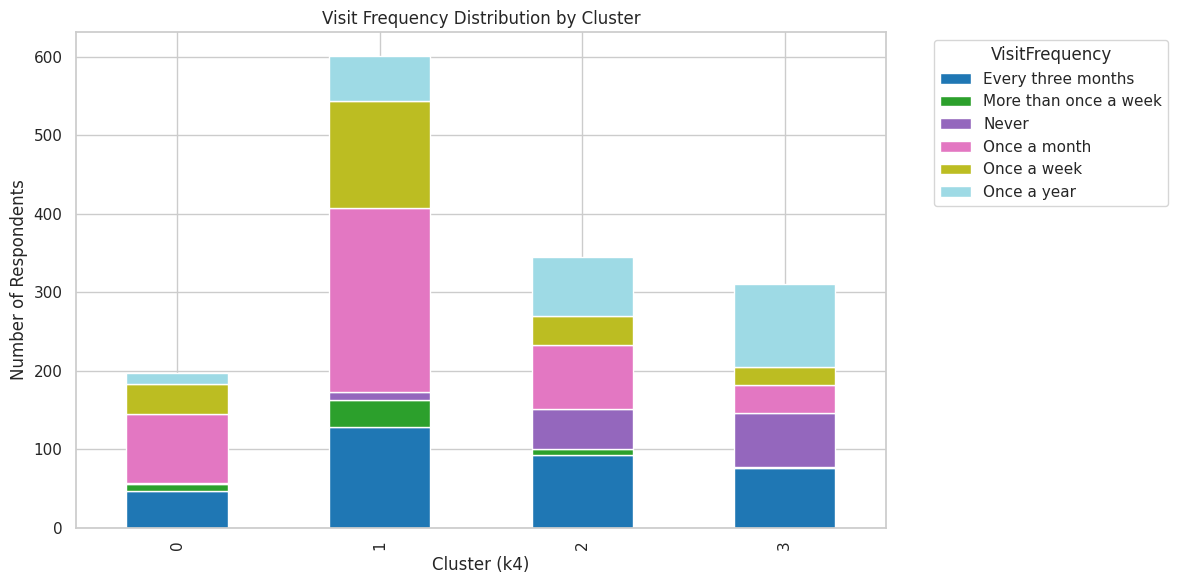

In [58]:
import pandas as pd

# Check if 'k4' and 'VisitFrequency' columns exist
if 'k4' not in df.columns or 'VisitFrequency' not in df.columns:
    raise ValueError("Missing 'k4' or 'VisitFrequency' column in the DataFrame.")

# Step 1: Get raw counts of VisitFrequency per cluster
visit_counts = df.groupby('k4')['VisitFrequency'].value_counts().unstack(fill_value=0)

print("📊 Visit Frequency Counts by Cluster:")
print(visit_counts)

# Step 2 (Optional): Get proportions instead of raw counts
visit_proportions = visit_counts.div(visit_counts.sum(axis=1), axis=0)

print("\n📈 Visit Frequency Proportions by Cluster:")
print(visit_proportions.round(2))

# Step 3 (Optional): Bar plot for visual summary
import matplotlib.pyplot as plt

visit_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Visit Frequency Distribution by Cluster")
plt.ylabel("Number of Respondents")
plt.xlabel("Cluster (k4)")
plt.legend(title='VisitFrequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()